<a href="https://colab.research.google.com/github/mar-wong/test/blob/main/beugung_am_gitter_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import & clean up dataframe

In [ ]:
df = pd.read_csv("testfile_200222-1124_Beugung_0.2.csv", skiprows=2)
df = df.drop("# I:(a.U.)", axis=1)
df = df.rename(columns={"Unnamed: 1": "x", "Unnamed: 2": "y"})
df

,x,y
0,0.00,0.003015
1,0.05,0.002082
2,0.10,0.002641
3,0.15,0.002455
4,0.20,0.002641
...,...,...
192,9.60,0.002082
193,9.65,0.002455
194,9.70,0.001895
195,9.75,0.002268


# Plot

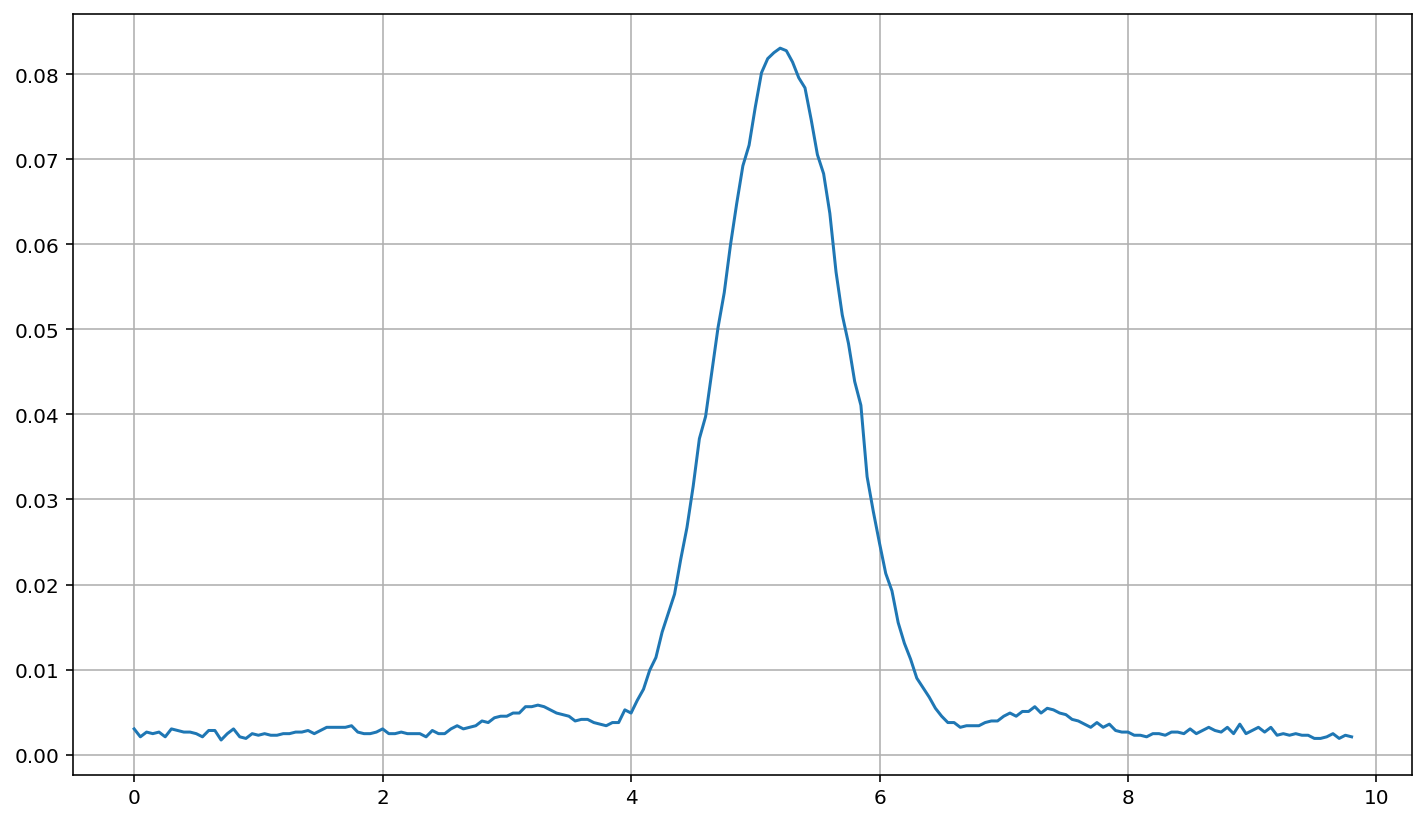

In [ ]:
plt.plot(df["x"], df["y"])
plt.grid(True)
plt.show()

# Simulation

## Without sliders

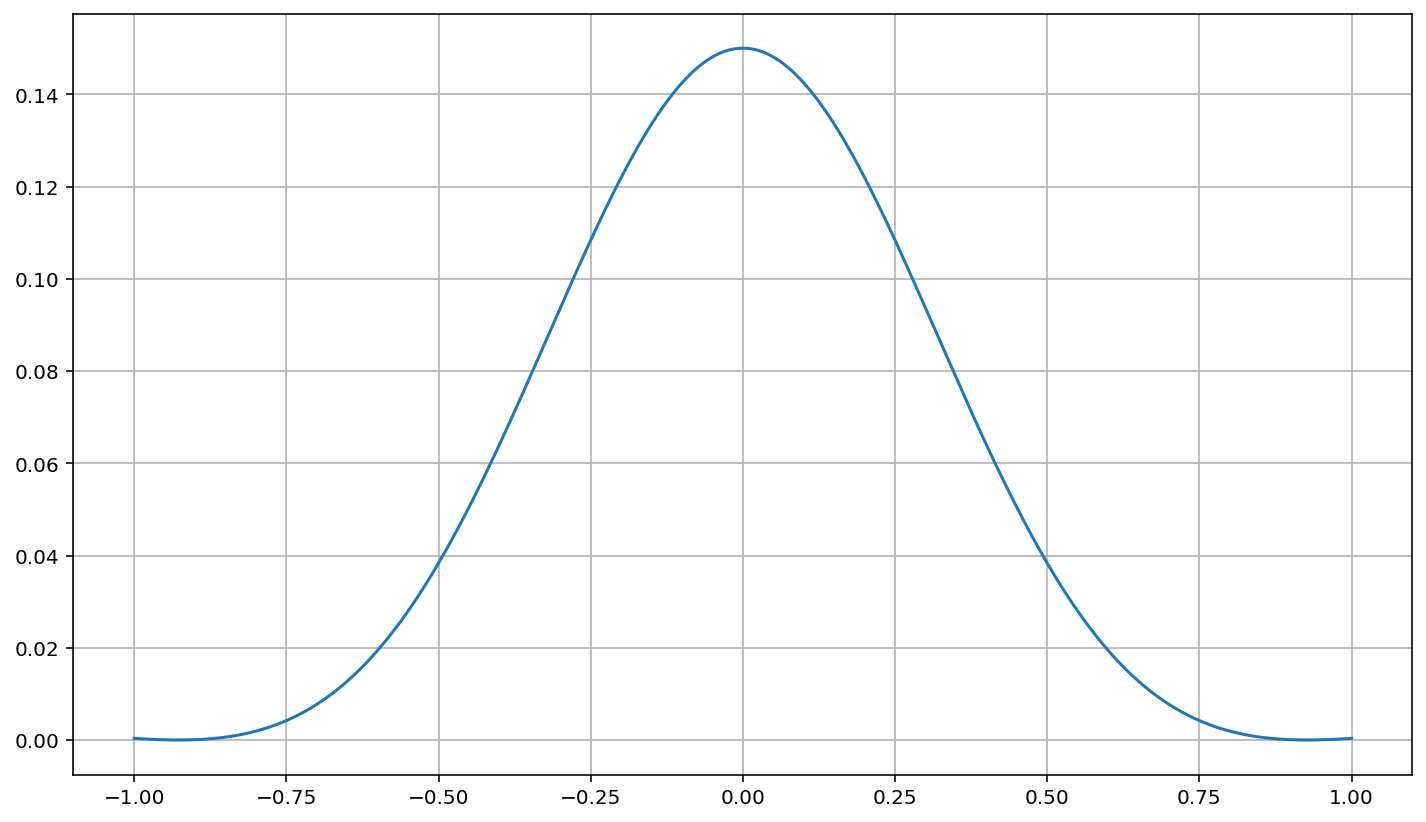

In [ ]:
def func(x, a, g, N, λ):
    numerator1 = np.sin((a / λ) * np.pi * np.sin(x))
    denominator1 = np.pi * (a / λ) * np.sin(x)
    term1 = (numerator1 / denominator1)**2

    numerator2 = np.sin((g / λ) * np.pi * N * np.sin(x))
    denominator2 = np.sin(np.pi * (g / λ) * np.sin(x))
    term2 = (numerator2 / denominator2)**2

    result = 0.15 * term1 * term2
    return result


a = 1
g = 6
N = 1
λ = 0.8
f = lambda x: func(x, a, g, N, λ)

x = np.linspace(-1, 1, 1000)
y = np.array(list(map(f, x)))

plt.plot(x, y)
plt.grid(True)
plt.show()

## With sliders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider


def func(x, a, g, N, λ):
    numerator1 = np.sin((a / λ) * np.pi * np.sin(x))
    denominator1 = np.pi * (a / λ) * np.sin(x)
    term1 = (numerator1 / denominator1)**2

    numerator2 = np.sin((g / λ) * np.pi * N * np.sin(x))
    denominator2 = np.sin(np.pi * (g / λ) * np.sin(x))
    term2 = (numerator2 / denominator2)**2

    result = 0.15 * term1 * term2
    return result


def plot_func(a, g, N, λ):
    f = lambda x: func(x, a, g, N, λ)
    x = np.linspace(-1, 1, 1000)
    y = np.array(list(map(f, x)))

    plt.plot(x, y)
    plt.grid(True)
    plt.show()


a_slider = FloatSlider(value=0.4, min=0.4, max=2, step=0.01, description='a:')
g_slider = FloatSlider(value=2, min=2, max=6, step=0.01, description='g:')
N_slider = IntSlider(value=1, min=1, max=10, step=1, description='N:')
λ_slider = FloatSlider(value=0.4, min=0.4, max=0.8, step=0.1, description='λ:')

interact(plot_func, a=a_slider, g=g_slider, N=N_slider, λ=λ_slider)
pass

interactive(children=(FloatSlider(value=0.4, description='a:', max=2.0, min=0.4, step=0.01), FloatSlider(value…